In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
from torch.utils.data import DataLoader, Dataset
import numpy as np
from helper import *
import sklearn 
import scipy

In [2]:
architecture_name = "autoencoder_ordinal"

In [3]:
data = torch.from_numpy(getData("Data/rbcL_ordinal_encoding.txt", 50000)).float()

In [4]:
print(data.shape)

torch.Size([50000, 300])


In [5]:
# https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/
class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(data.shape[1], 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
         
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, data.shape[1])
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def encode(self, x):
        return self.encoder(x)

class DNADataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.sequences[idx])

model = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

dataset = DNADataset(data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

epochs = 20
          
criterion = nn.MSELoss()
outputs = []
losses = []

# for epoch in range(epochs):
#     for batch in dataloader:
              
#         reconstructed = model(batch)
        
#         loss = criterion(reconstructed, batch)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         losses.append(loss)
#     outputs.append((epochs, batch, reconstructed))
#     print(f"Batch loss is {loss}")

#     print("Training epoch {ep} done".format(ep=epoch))

# torch.save(model.state_dict(), f'{architecture_name}.pth')



In [6]:
device = torch.device('cpu')
model = AutoEncoder()
model.load_state_dict(torch.load(f'{architecture_name}.pth', map_location=device))
model.eval()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=300, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=300, bias=True)
  )
)

In [9]:
sequences = getData("Data/rbcL_ordinal_encoding.txt", 50000)

num_clusters = pairWiseCrossValidation(data, sequences, model)

Label 0: Count 9993
Label 1: Count 37261
Label 2: Count 2746
Label 0: Count 2746
Label 1: Count 11149
Label 2: Count 34945
Label 3: Count 1160
Label 0: Count 37929
Label 1: Count 2746
Label 2: Count 1160
Label 3: Count 1740
Label 4: Count 6425
Label 0: Count 1740
Label 1: Count 42464
Label 2: Count 2746
Label 3: Count 970
Label 4: Count 641
Label 5: Count 1439
Label 0: Count 41146
Label 1: Count 1740
Label 2: Count 1160
Label 3: Count 1439
Label 4: Count 799
Label 5: Count 970
Label 6: Count 2746
Label 0: Count 2497
Label 1: Count 1740
Label 2: Count 2746
Label 3: Count 38953
Label 4: Count 1160
Label 5: Count 970
Label 6: Count 495
Label 7: Count 1439
Label 0: Count 1160
Label 1: Count 40012
Label 2: Count 1740
Label 3: Count 2746
Label 4: Count 1439
Label 5: Count 970
Label 6: Count 743
Label 7: Count 641
Label 8: Count 549
Label 0: Count 6611
Label 1: Count 565
Label 2: Count 1740
Label 3: Count 1160
Label 4: Count 1439
Label 5: Count 2746
Label 6: Count 641
Label 7: Count 799
Label

In [7]:
num_clusters = 25

In [8]:
cluster_labels, unique_labels = KMeansOnEmbeddings(data, model, num_clusters)

Label 0: Count 799
Label 1: Count 32665
Label 2: Count 1740
Label 3: Count 2746
Label 4: Count 1439
Label 5: Count 565
Label 6: Count 549
Label 7: Count 743
Label 8: Count 1160
Label 9: Count 970
Label 10: Count 551
Label 11: Count 495
Label 12: Count 491
Label 13: Count 641
Label 14: Count 453
Label 15: Count 516
Label 16: Count 379
Label 17: Count 347
Label 18: Count 552
Label 19: Count 420
Label 20: Count 413
Label 21: Count 285
Label 22: Count 433
Label 23: Count 329
Label 24: Count 319


In [11]:
decodeSequencesRange(architecture_name, 0, num_clusters, data, ordinal_decoder, unique_labels, cluster_labels)

In [12]:
runClustalRange(architecture_name, 0, num_clusters, unique_labels, True)

Using 16 threads
Read 799 sequences (type: DNA) from clusters/autoencoder_ordinal/cluster_0.fasta
Using 92 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 799 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 69322)
Ktuple-distance calculation progress: 15 % (10882 out of 69322)
Ktuple-distance calculation progress: 16 % (11365 out of 69322)
Ktuple-distance calculation progress: 17 % (12028 out of 69322)
Ktuple-distance calculation progress: 18 % (12495 out of 69322)
Ktuple-distance calculation progress: 20 % (13916 out of 69322)
Ktuple-distance calculation progress: 31 % (22182 out of 69322)
Ktuple-distance calculation progress: 33 % (23273 out of 69322)
Ktuple-distance calculation progress: 34 % (23656 out of 69322)
Ktuple-distance calculation progress: 35 % (24375 out of 69322)
Ktuple-distance calculation progress: 36 % (25085 out of 69322)
Ktuple-distance calculation progress: 37 % (26209 ou

In [9]:
percentages = evaluateGapsInRange(architecture_name, 0, num_clusters, unique_labels)

clustal/autoencoder_ordinal/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 0.84%
clustal/autoencoder_ordinal/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 84.01%
clustal/autoencoder_ordinal/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 0.01%
clustal/autoencoder_ordinal/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 0.01%
clustal/autoencoder_ordinal/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 0.01%
clustal/autoencoder_ordinal/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 0.29%
clustal/autoencoder_ordinal/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 1.11%
clustal/autoencoder_ordinal/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 0.83%
clustal/autoencoder_ordinal/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 0.00%
clustal/autoencoder_ordinal/cluster_9.clustal
Percentage of gaps in the 

In [14]:
countPercentageLowerThan(percentages, 10)

24

Plot for cluster 0


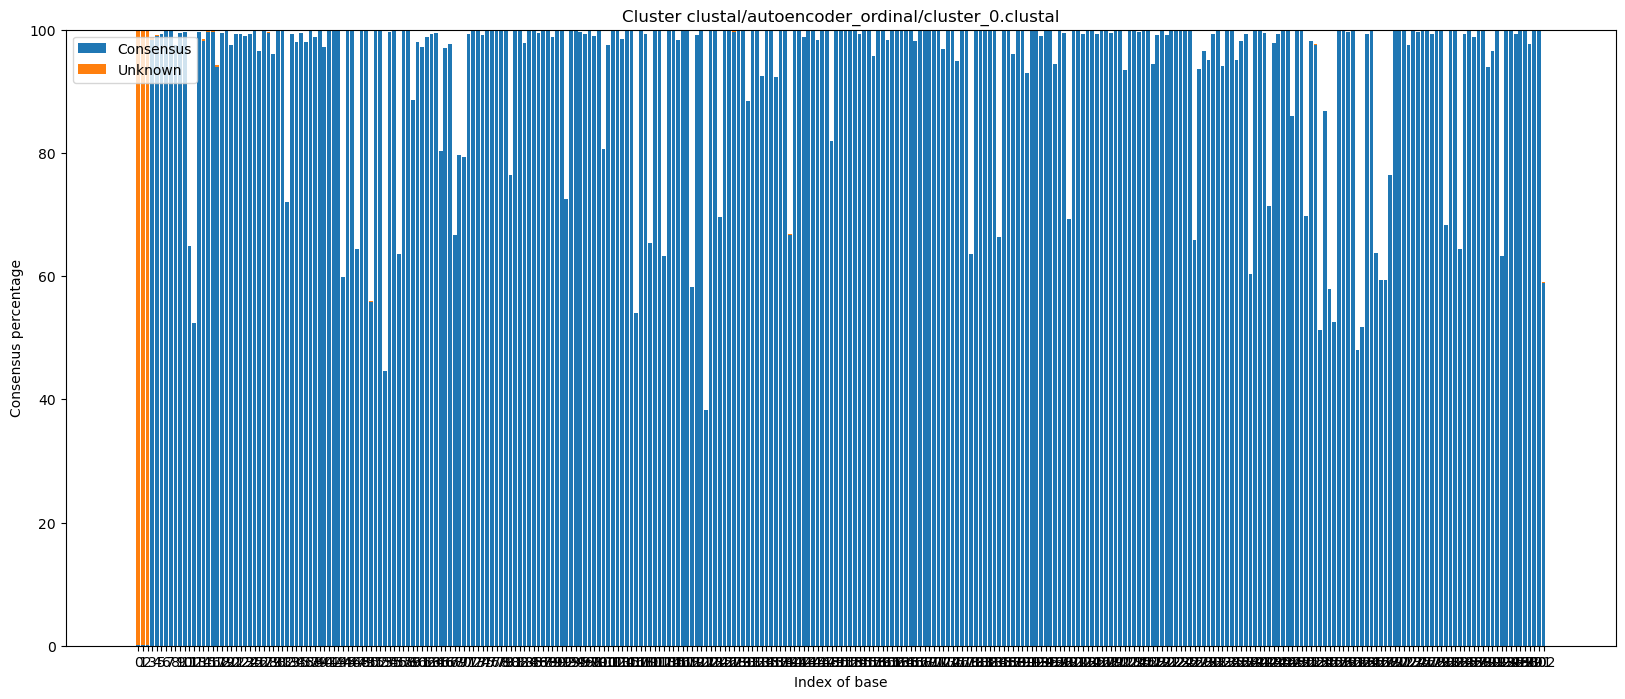

Plot for cluster 1


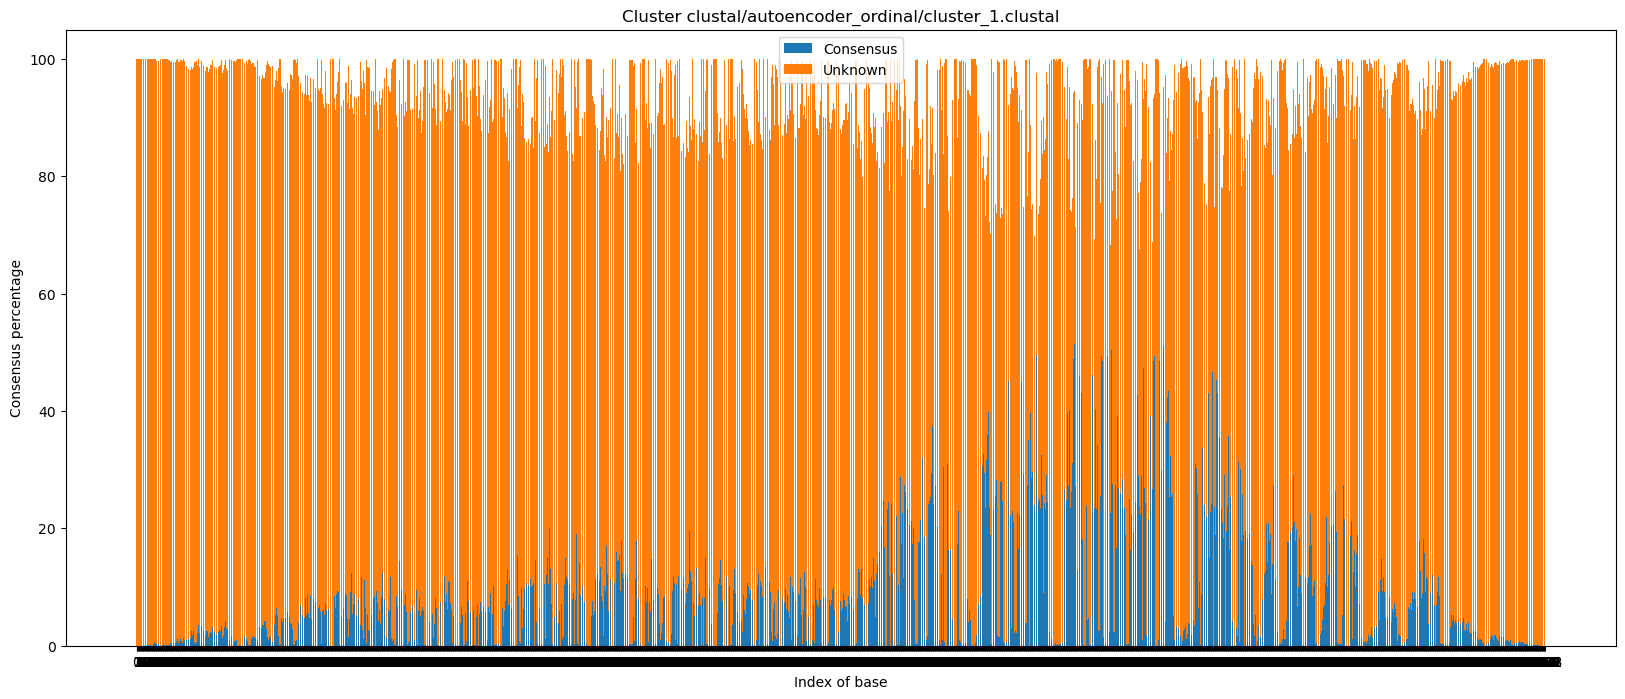

Plot for cluster 2


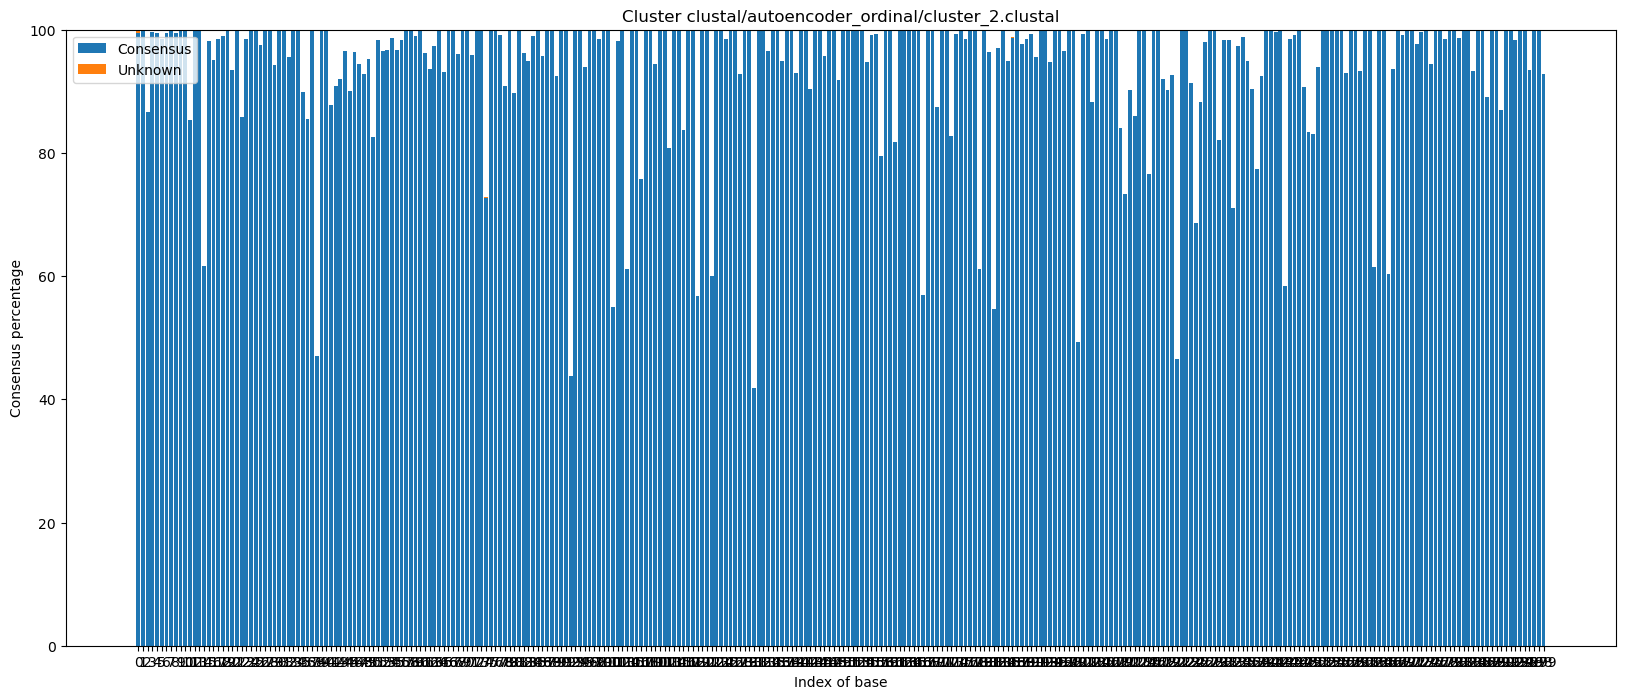

Plot for cluster 3


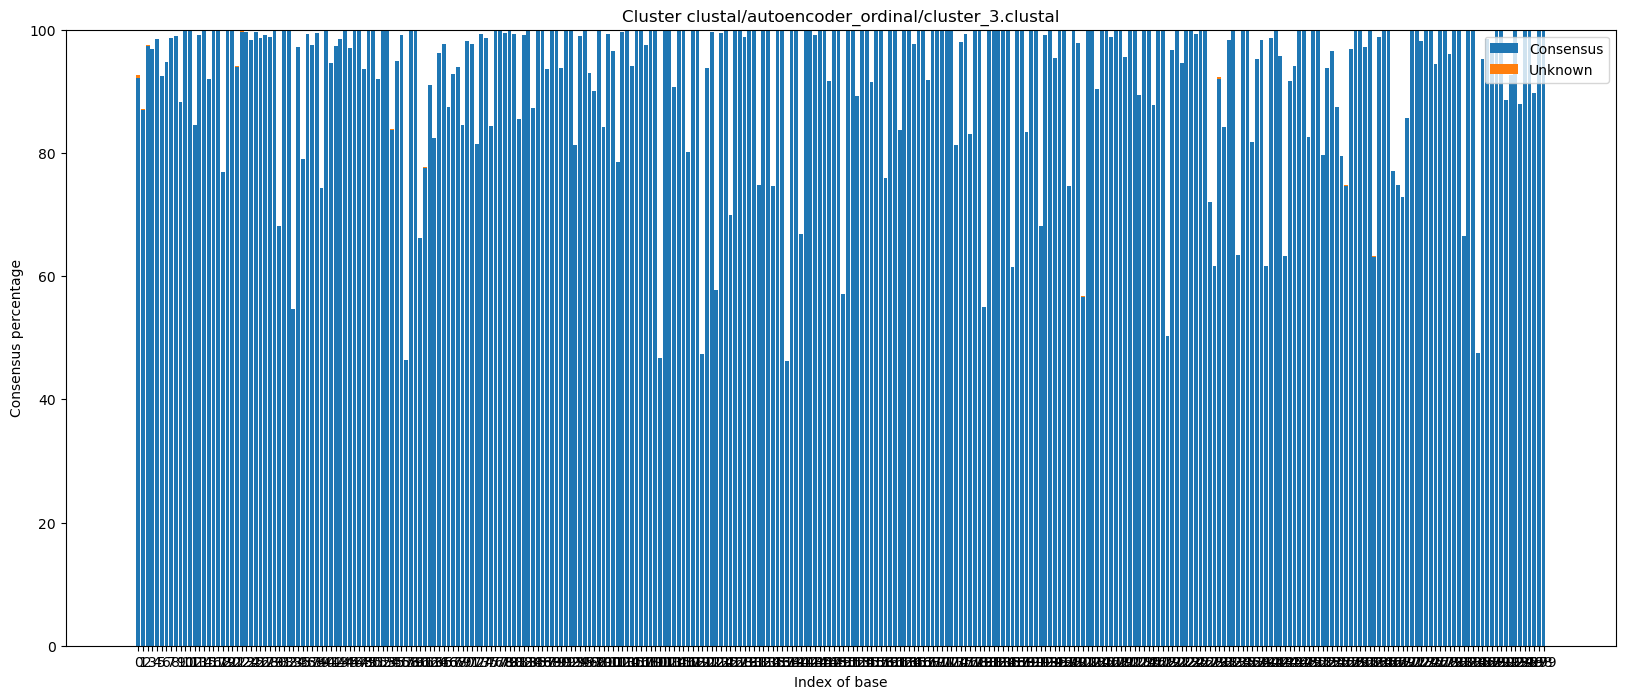

Plot for cluster 4


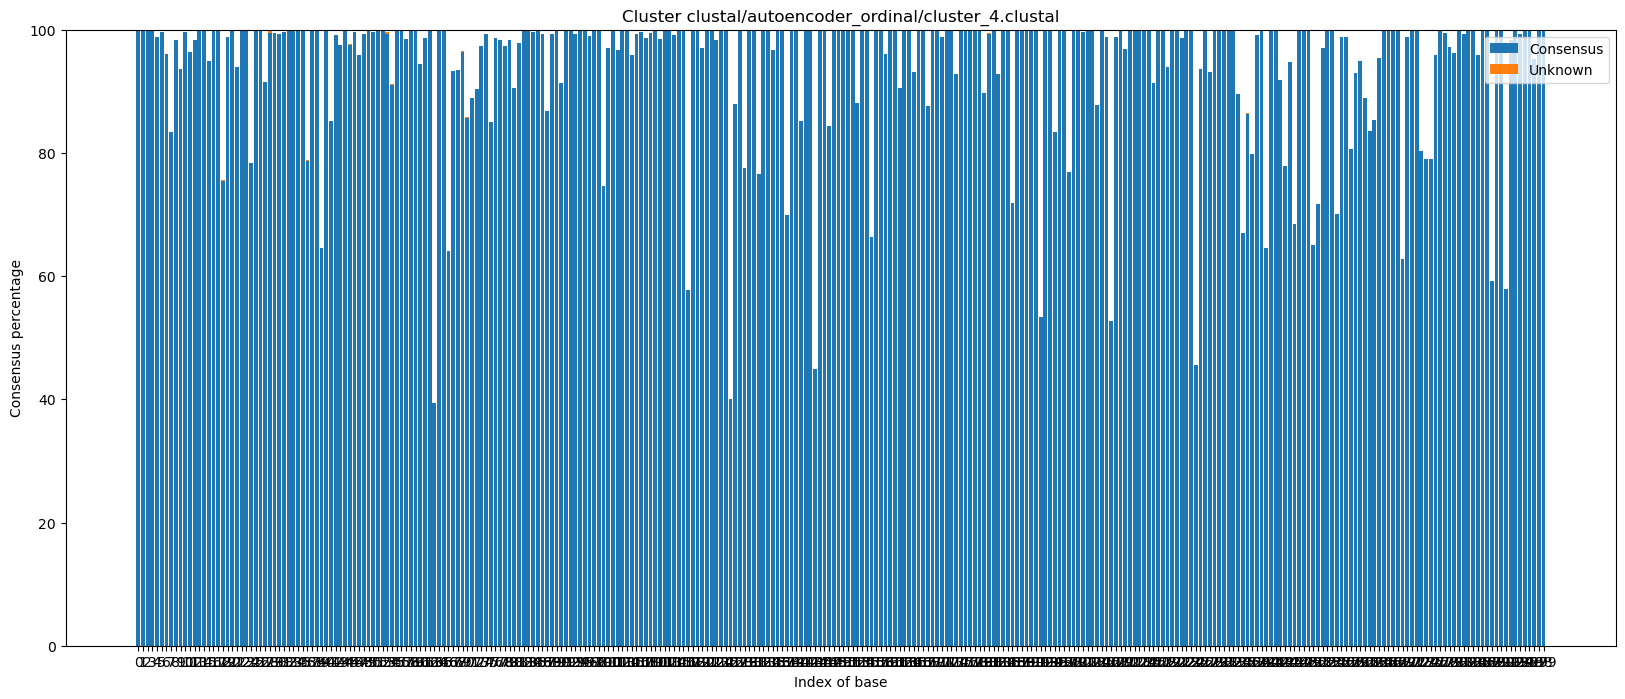

Plot for cluster 5


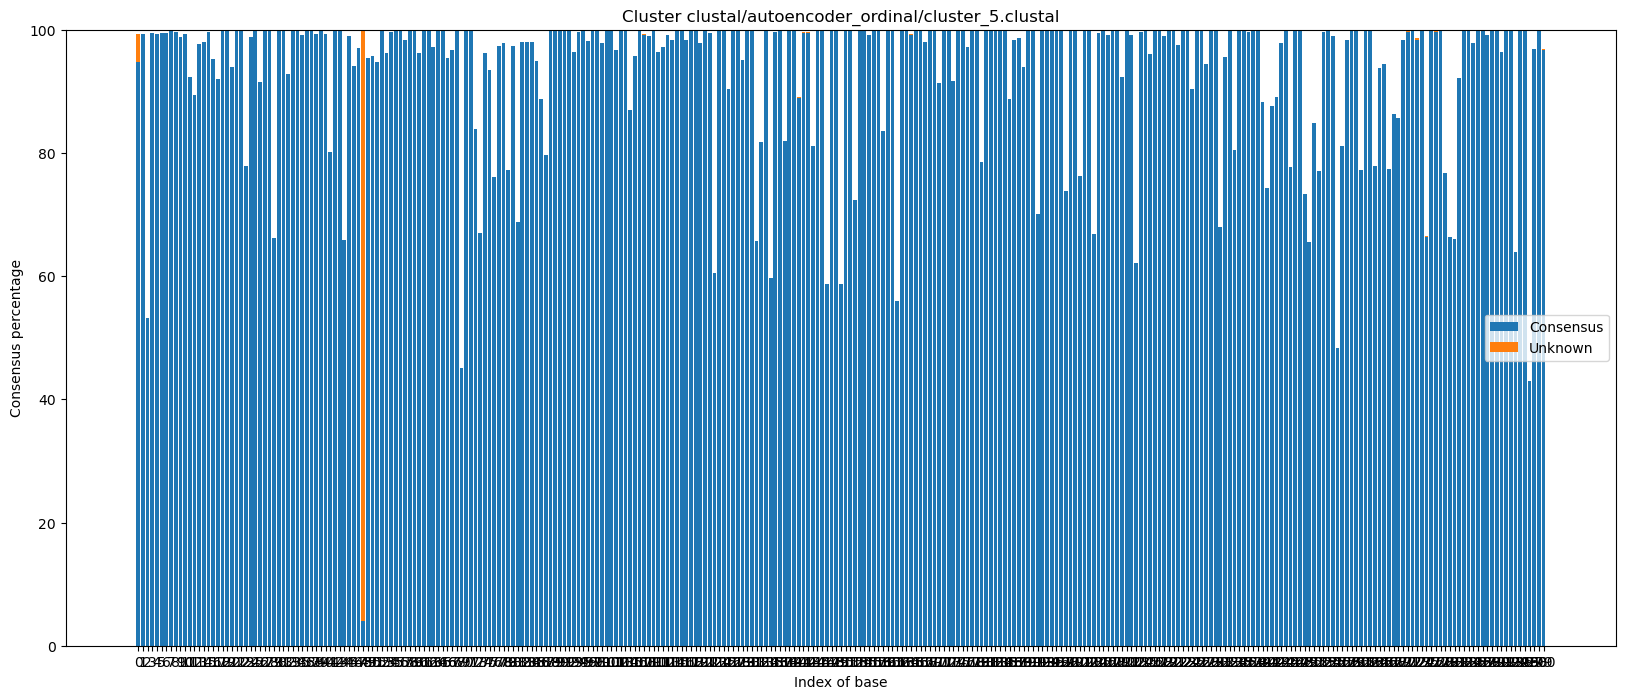

Plot for cluster 6


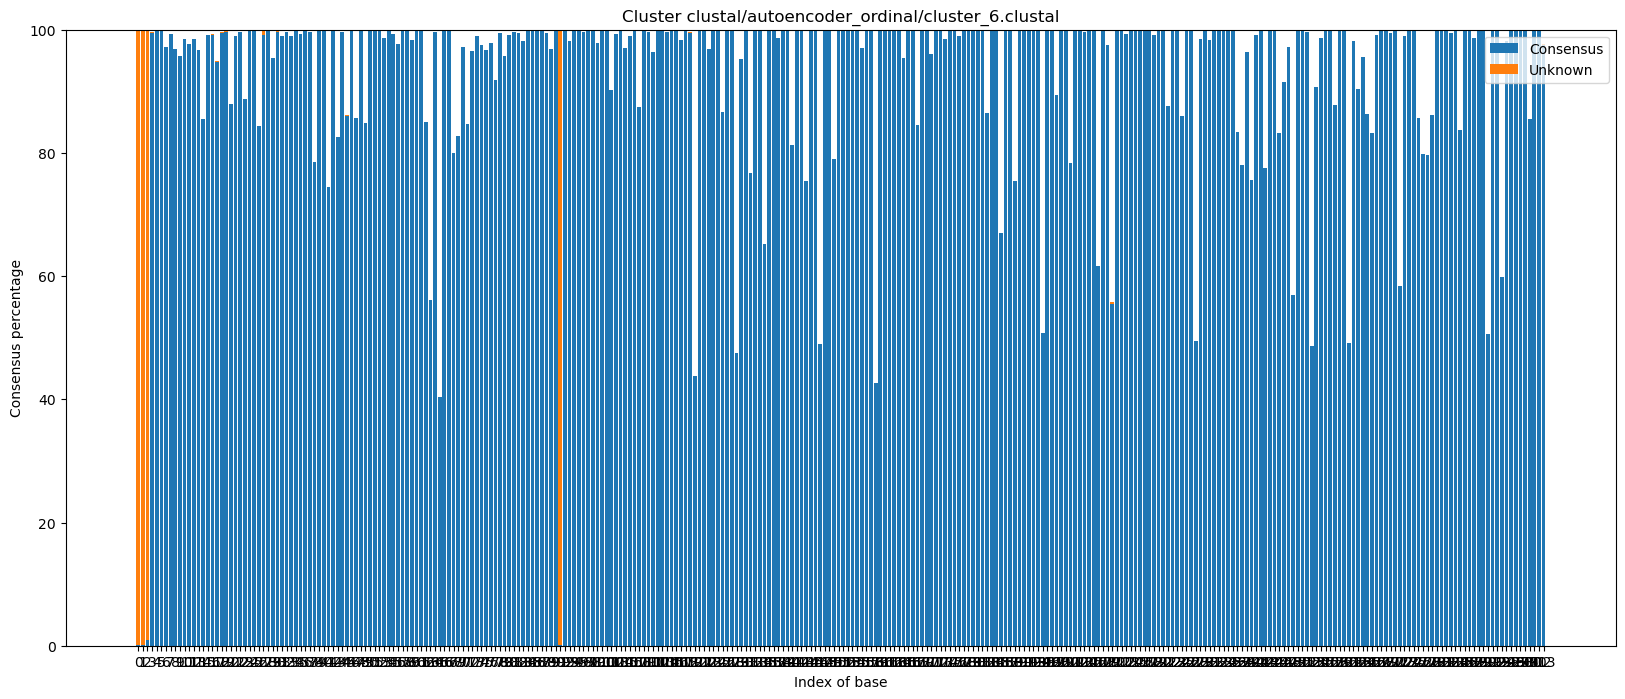

Plot for cluster 7


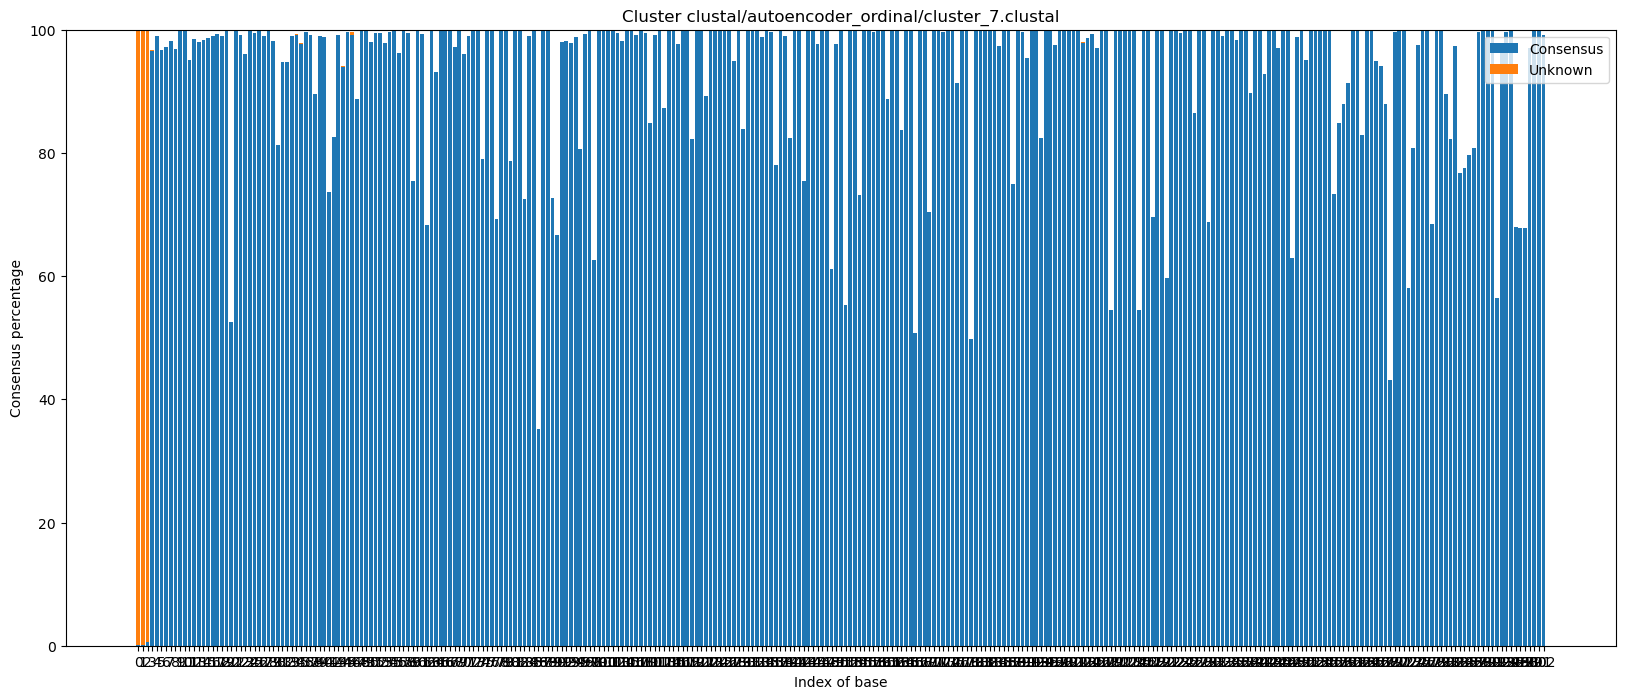

Plot for cluster 8


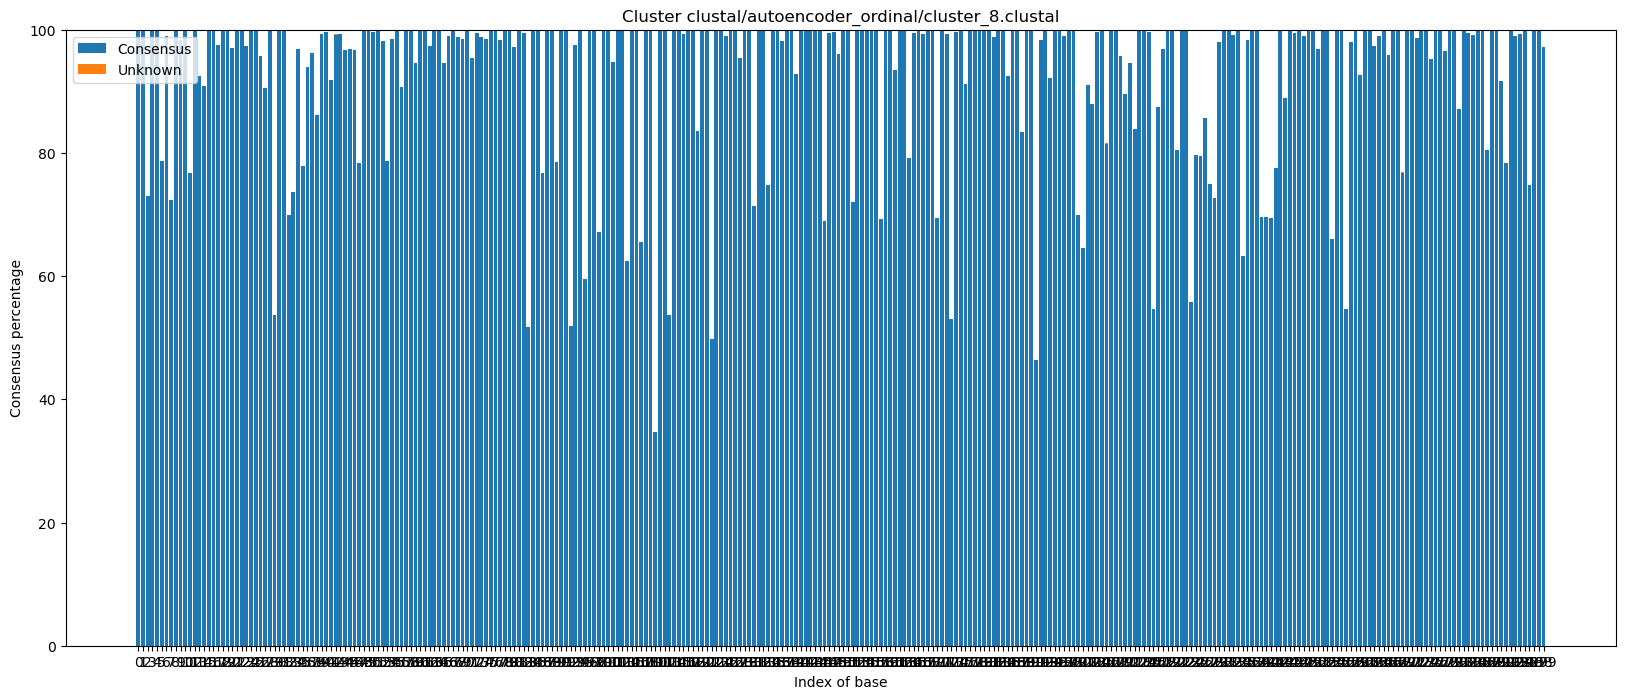

Plot for cluster 9


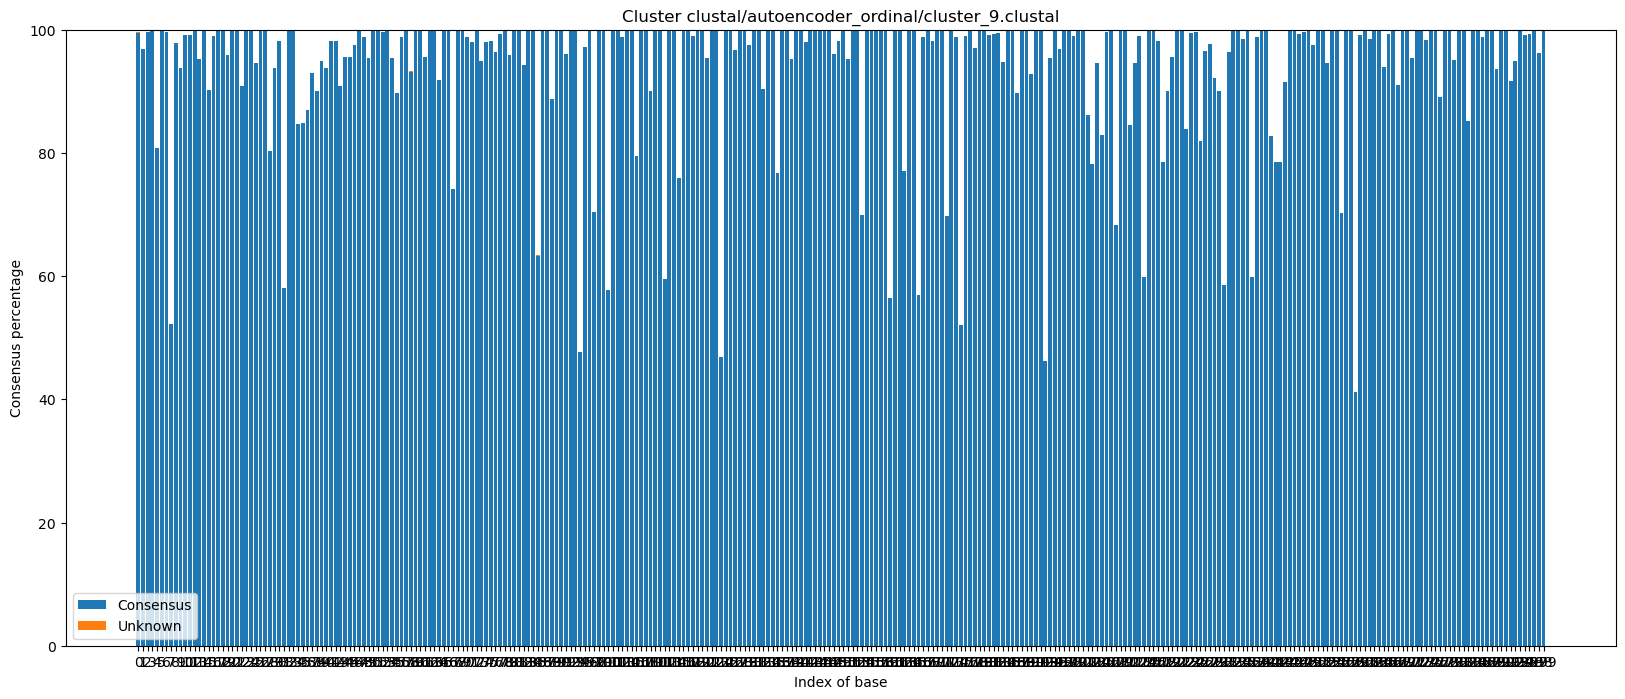

Plot for cluster 10


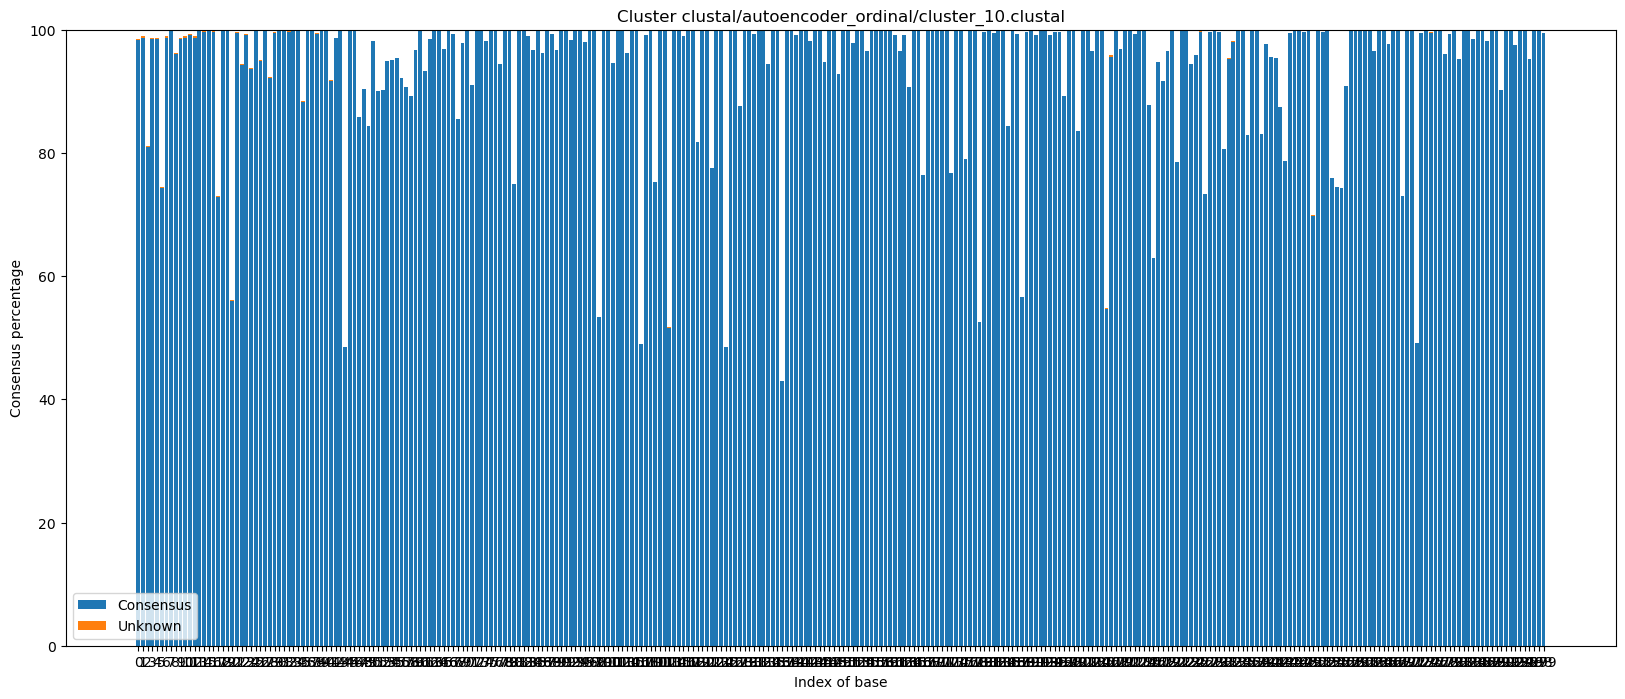

Plot for cluster 11


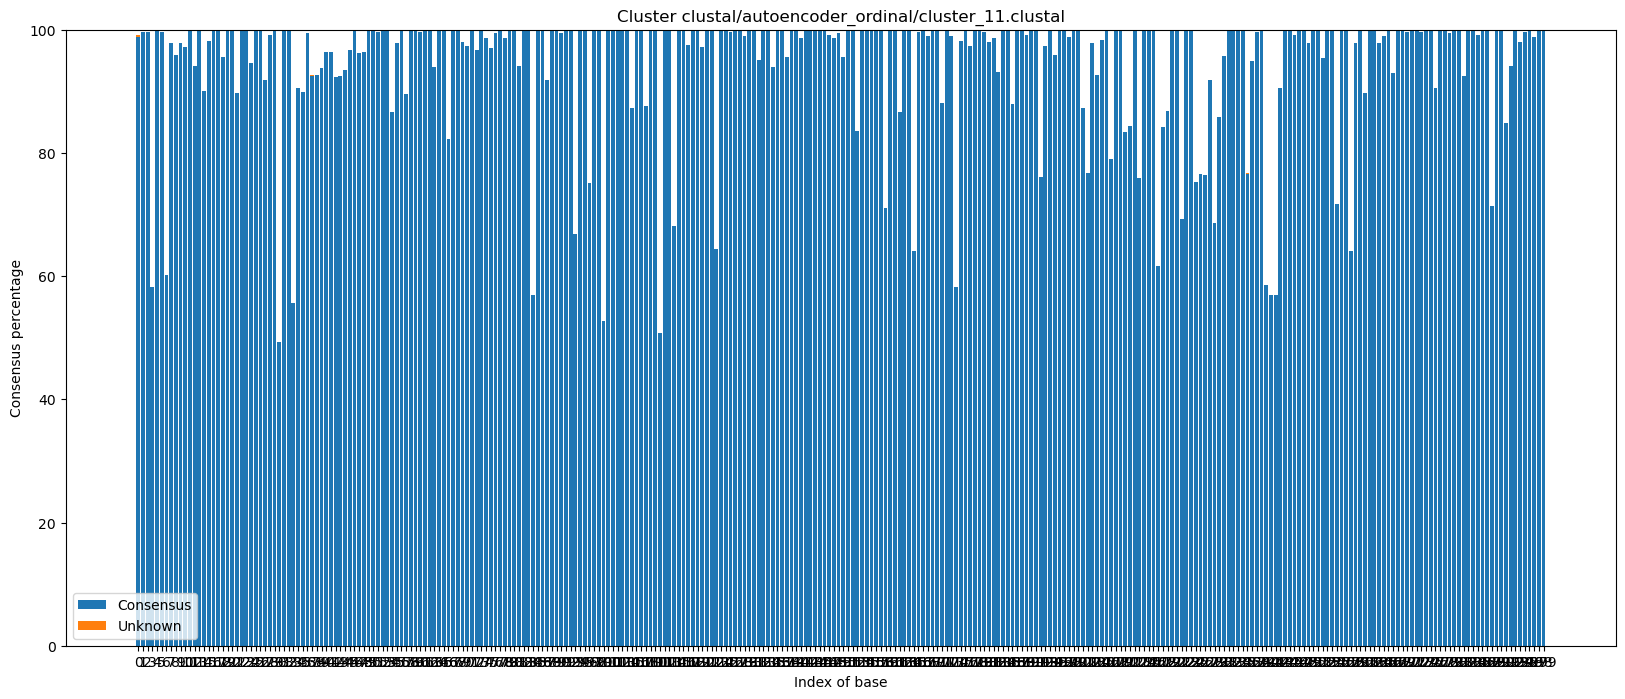

Plot for cluster 12


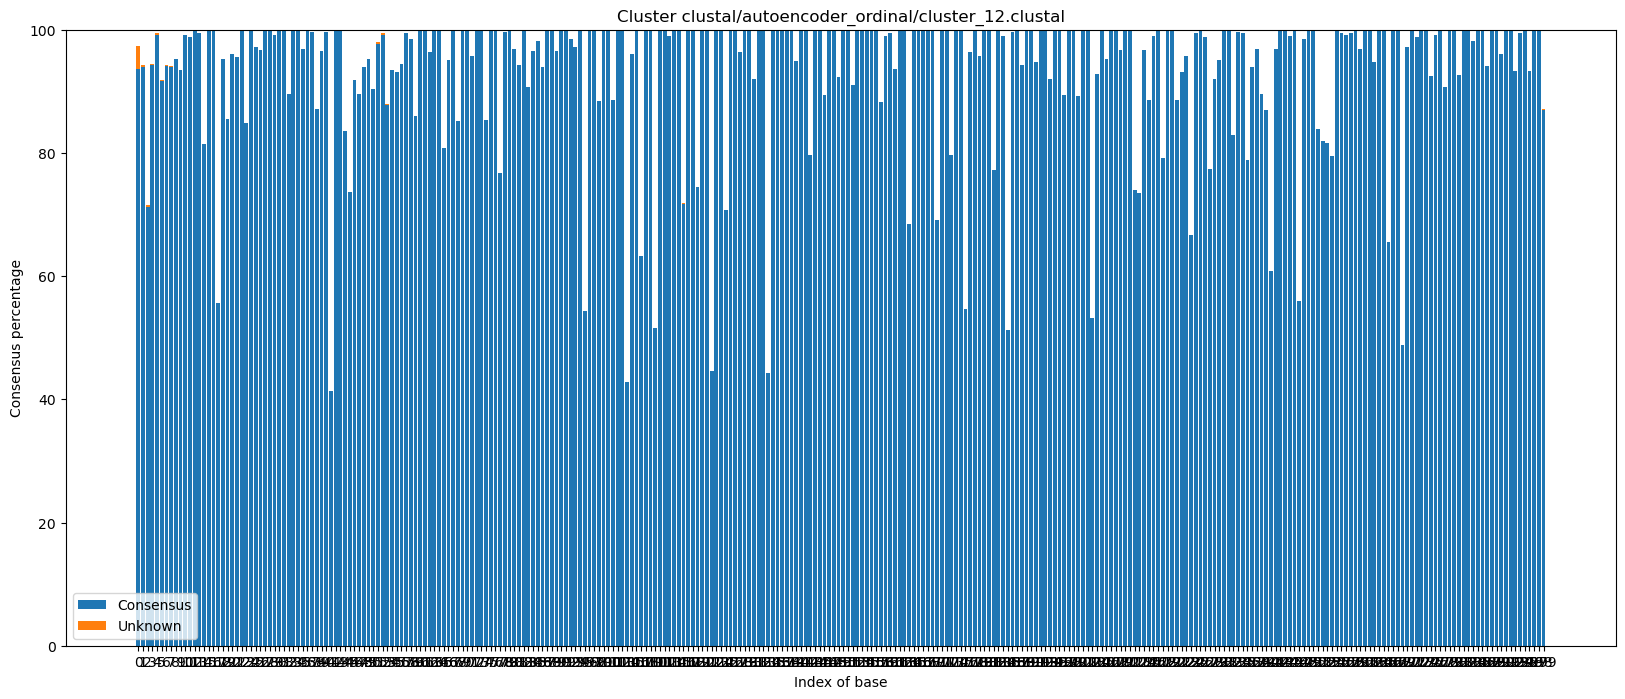

Plot for cluster 13


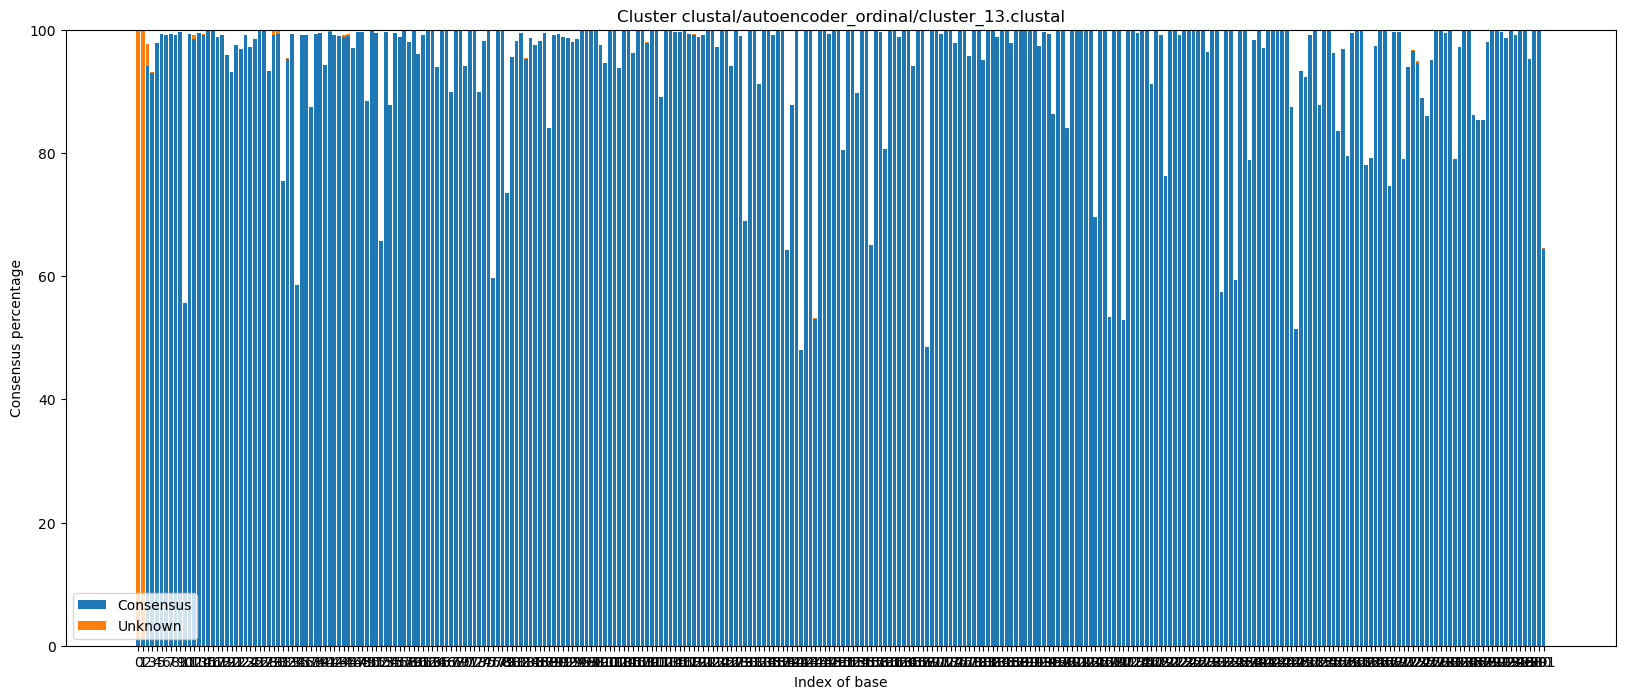

Plot for cluster 14


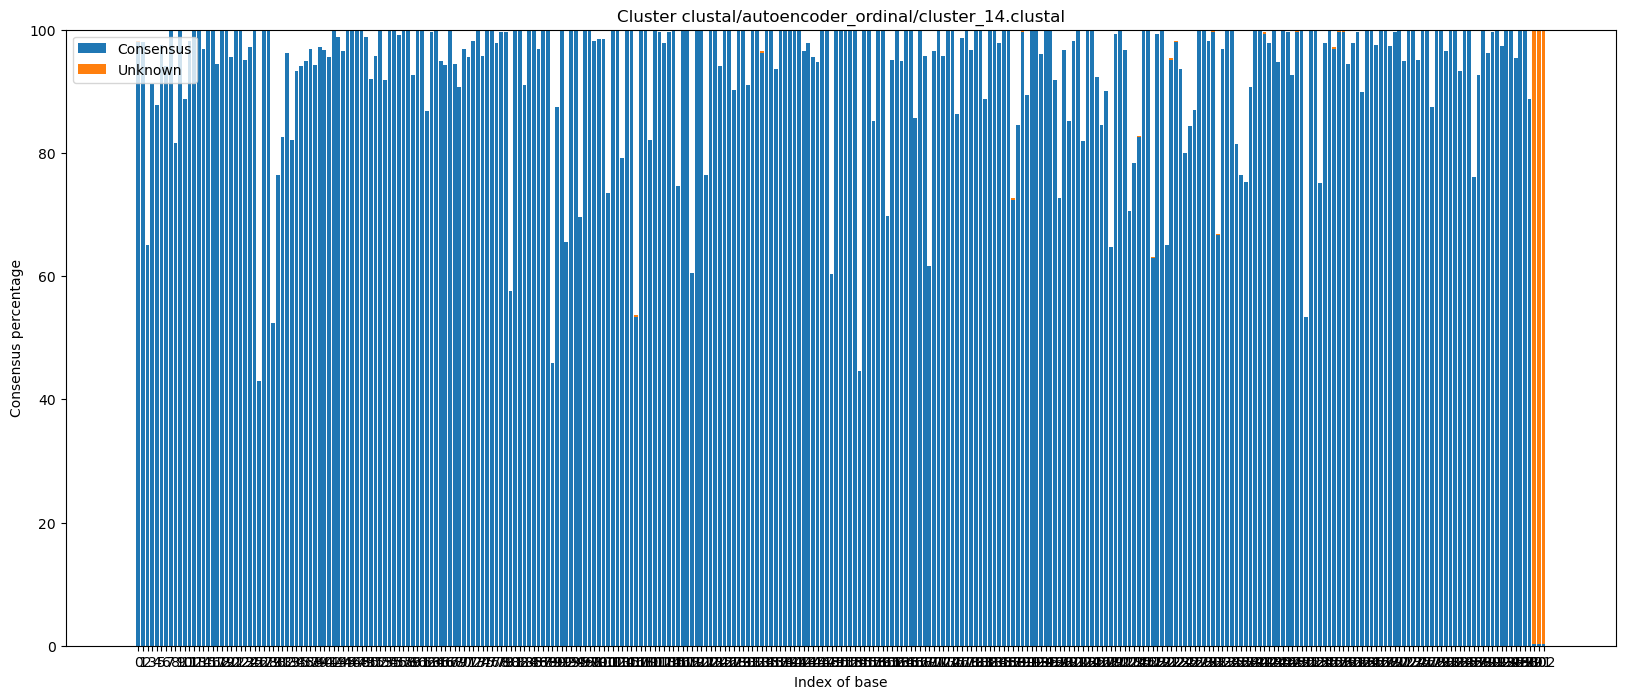

Plot for cluster 15


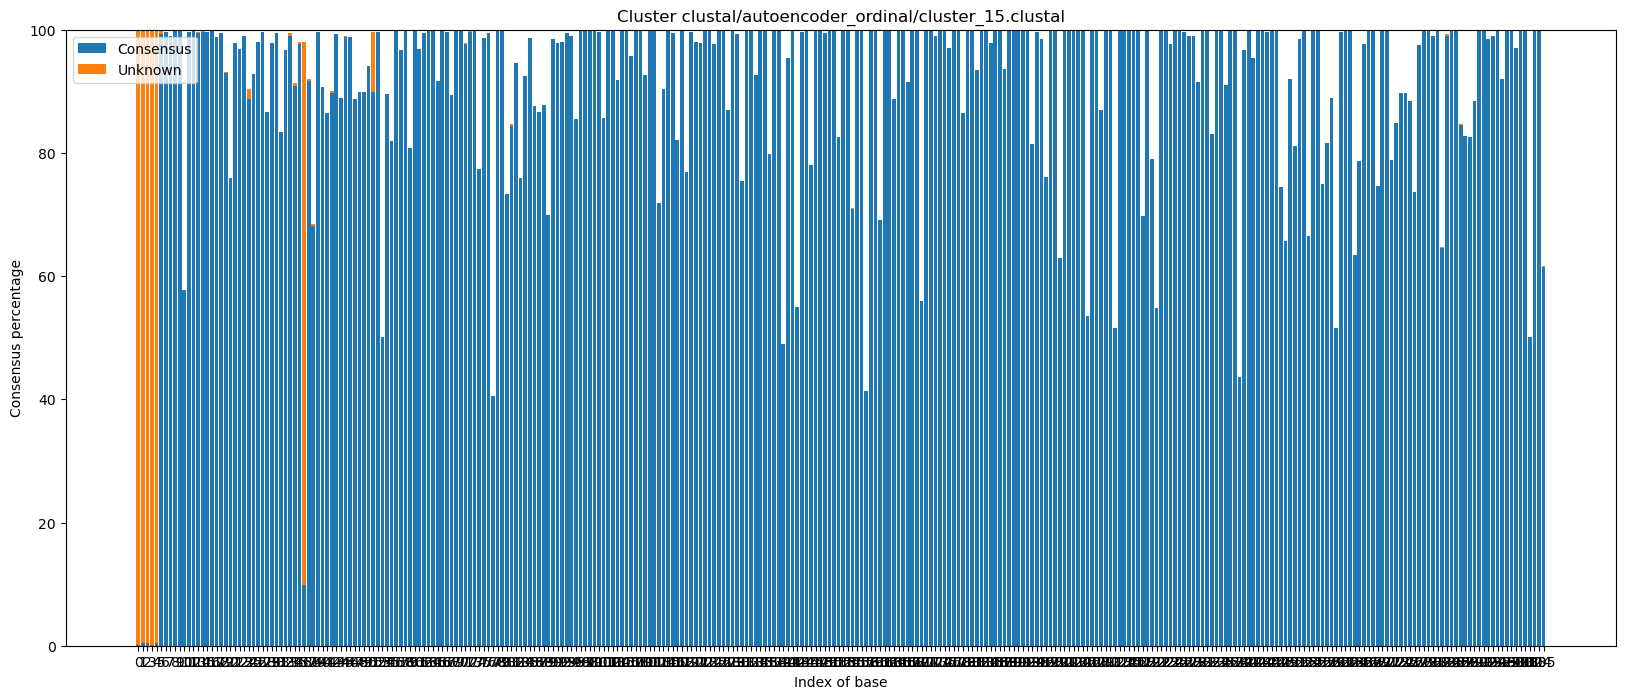

Plot for cluster 16


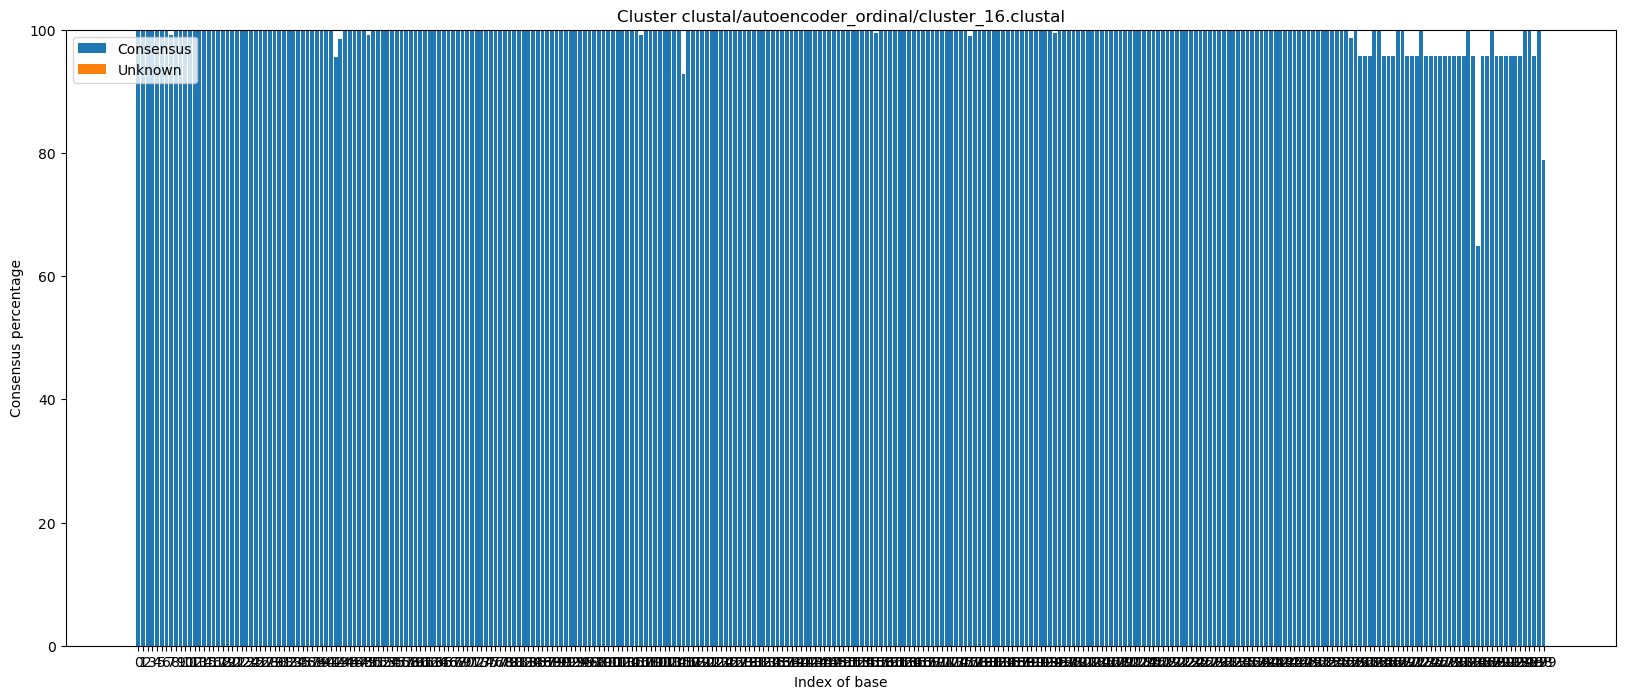

Plot for cluster 17


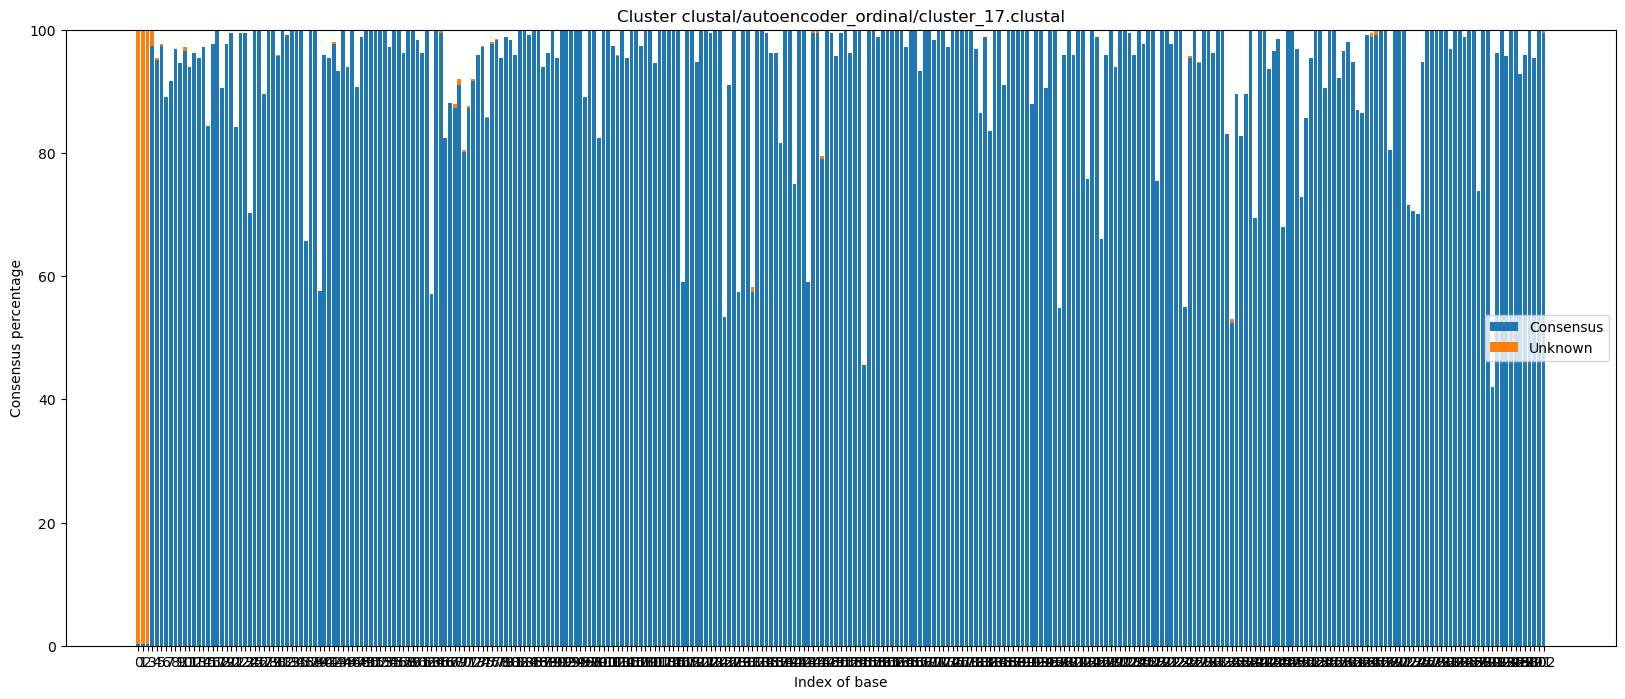

Plot for cluster 18


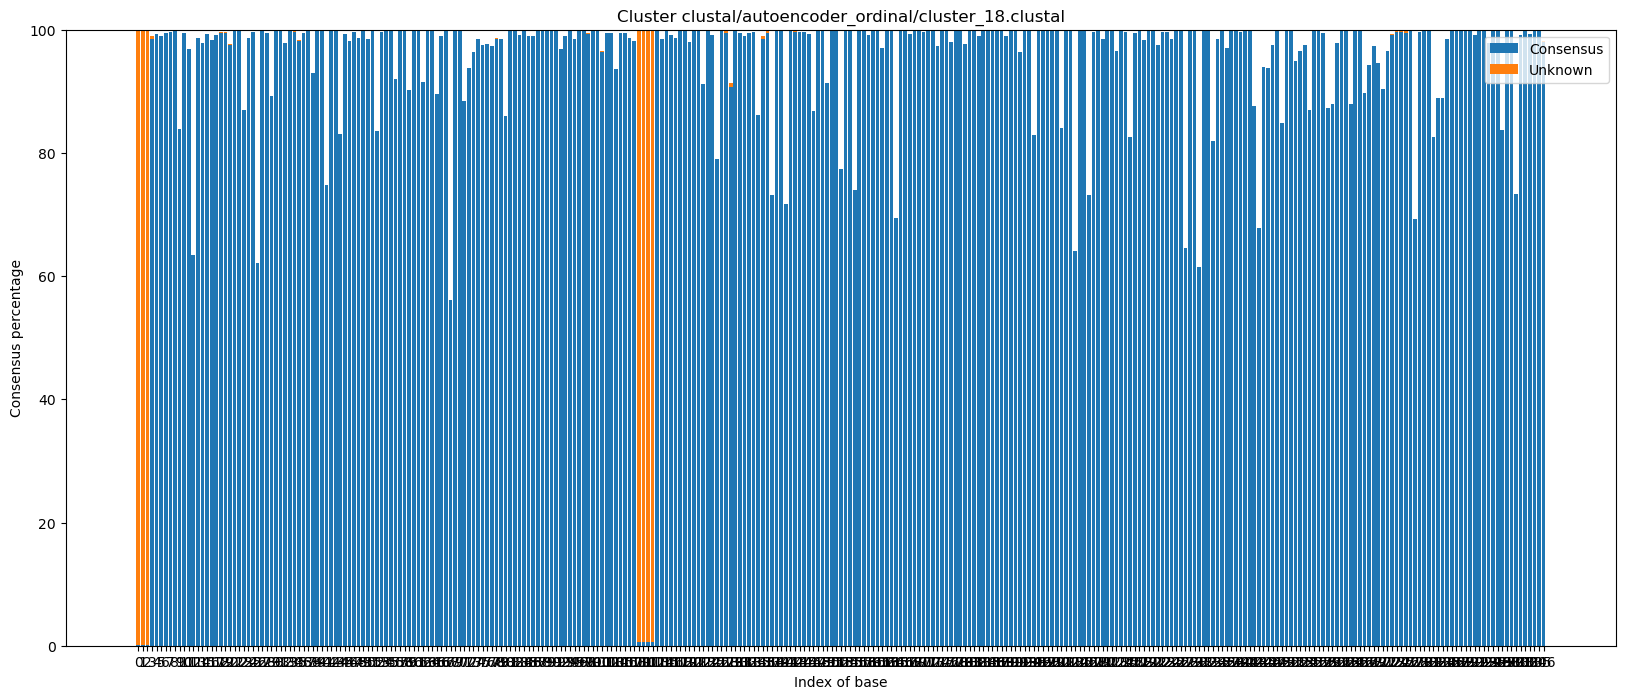

Plot for cluster 19


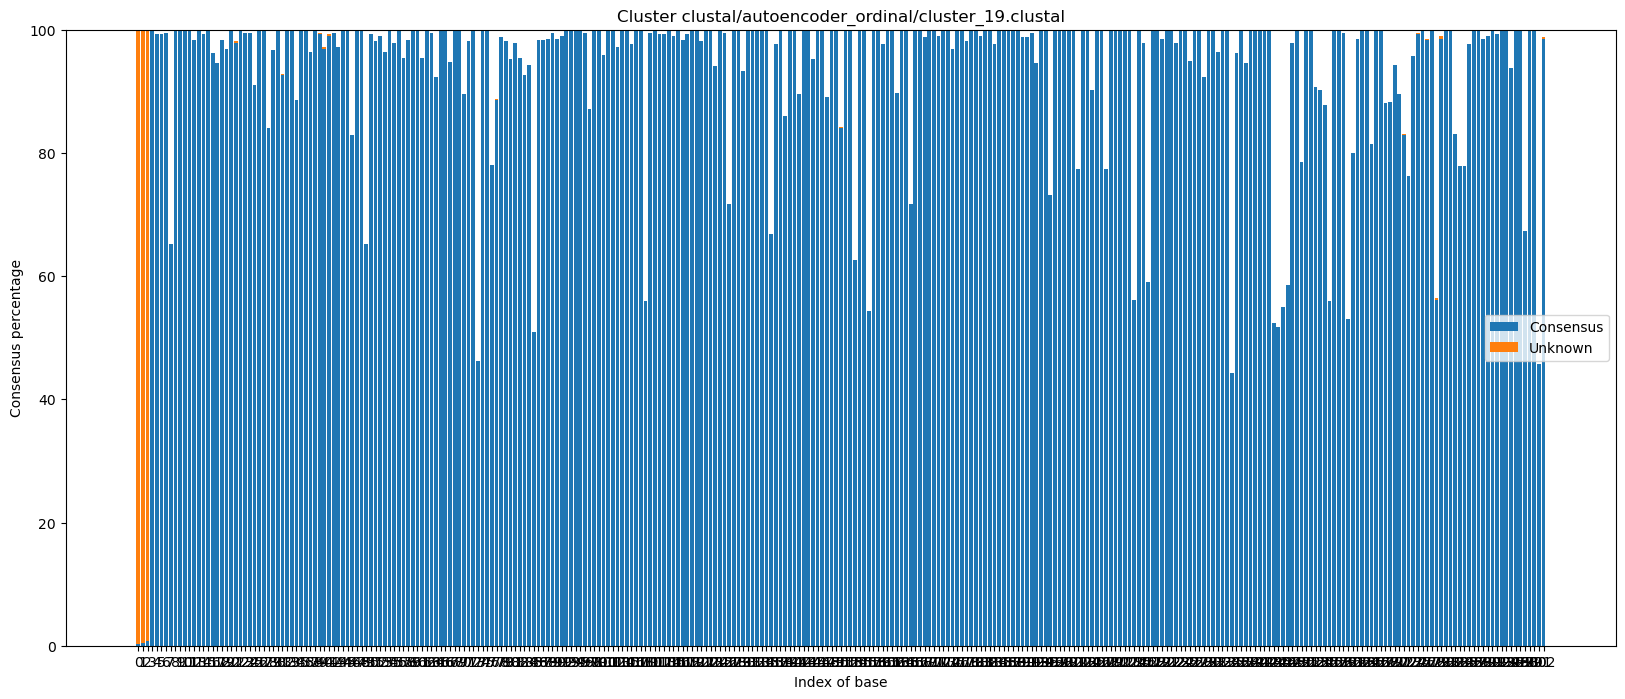

Plot for cluster 20


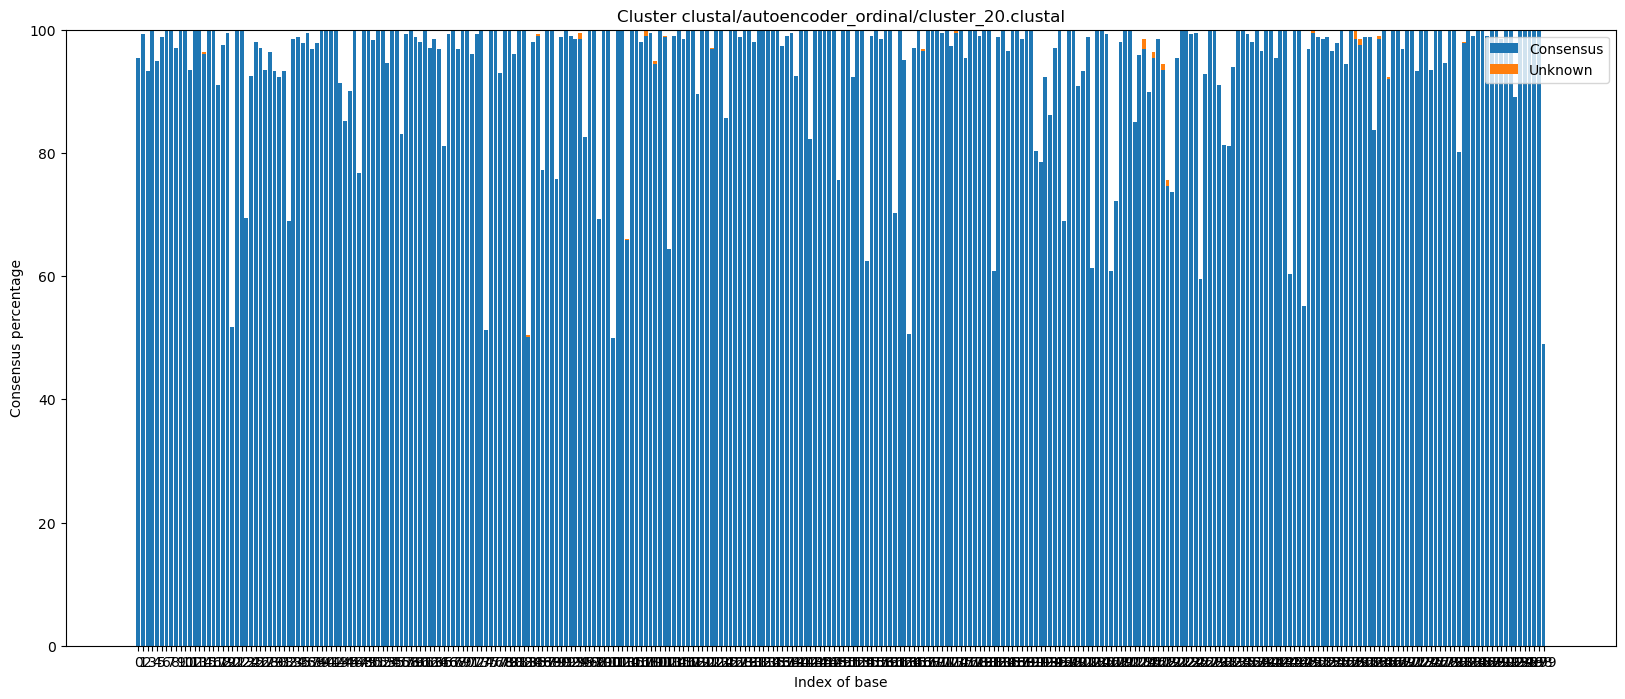

Plot for cluster 21


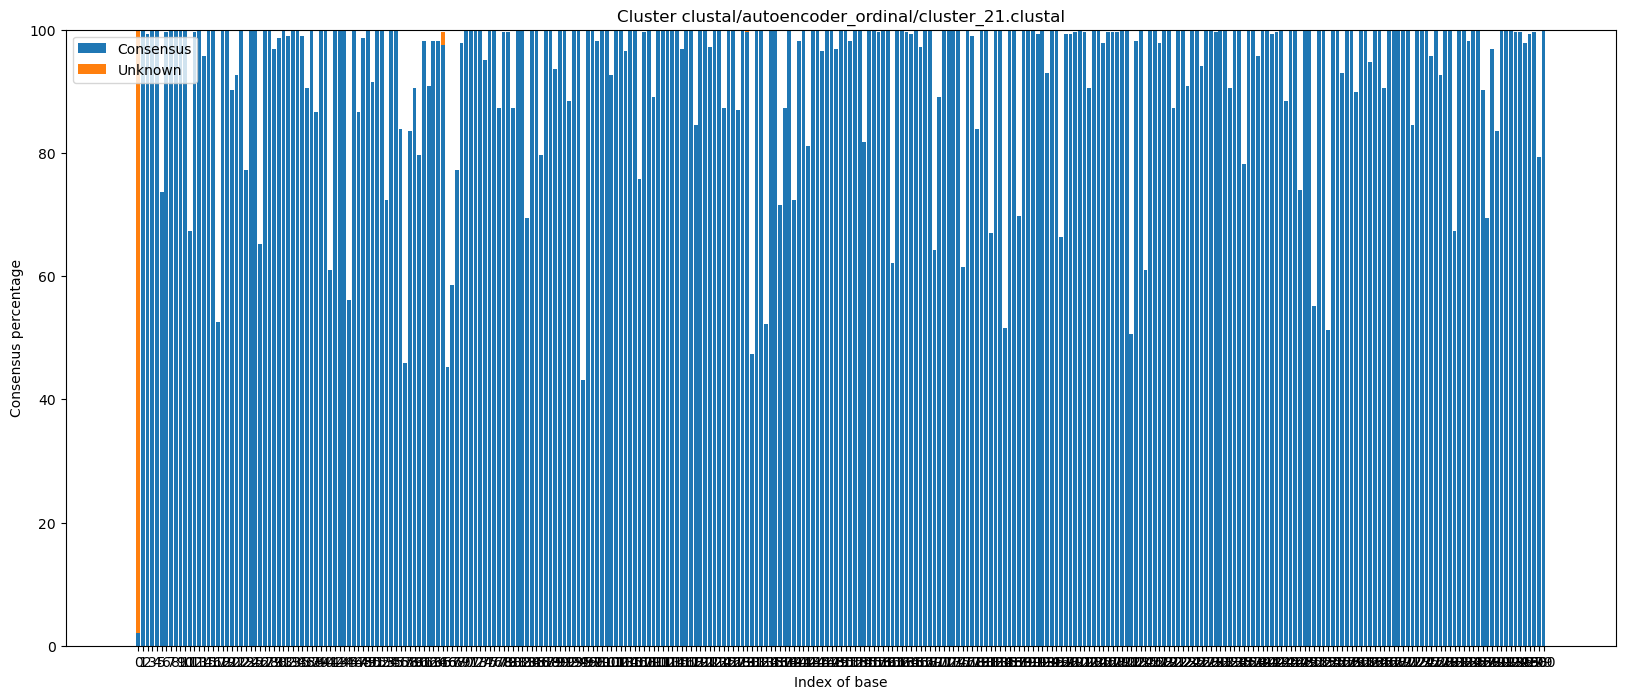

Plot for cluster 22


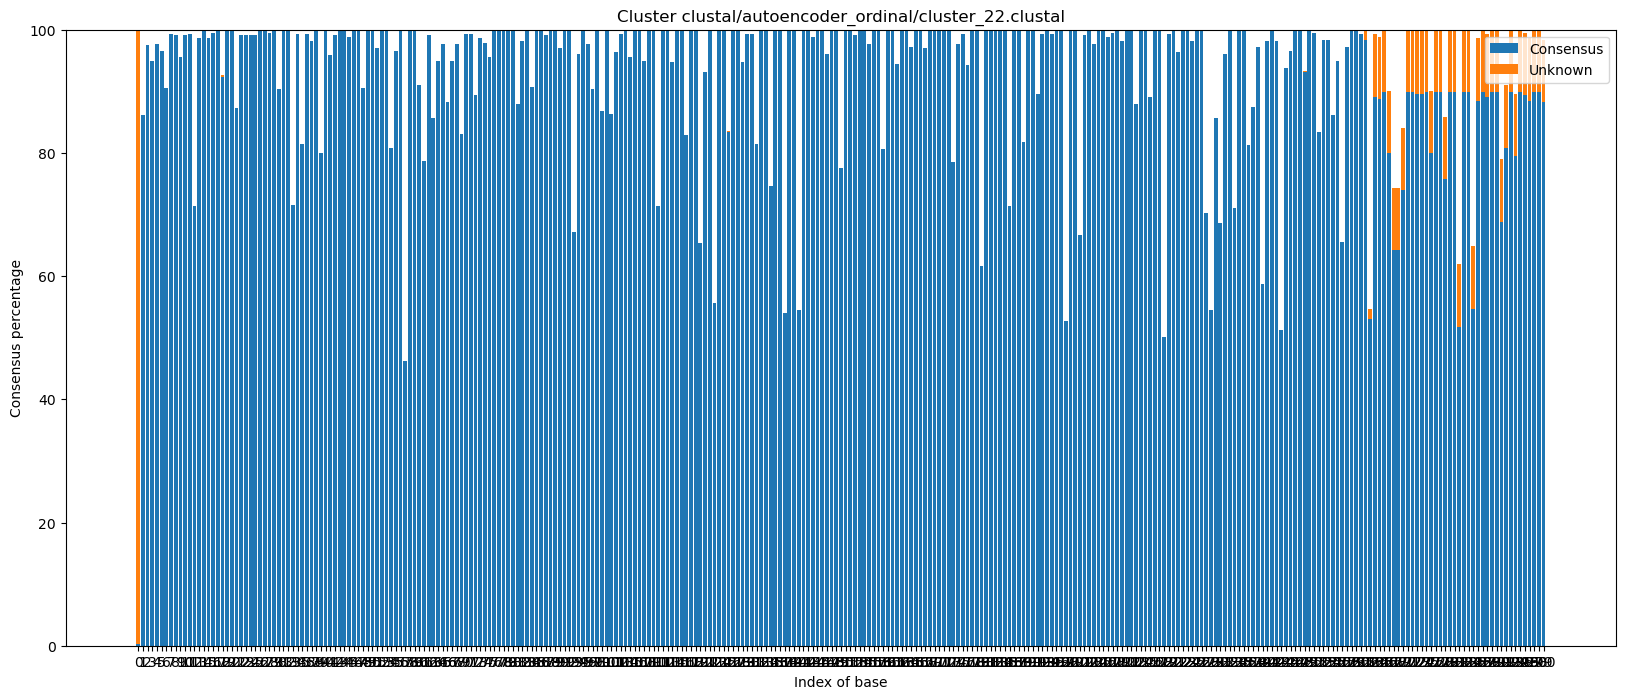

Plot for cluster 23


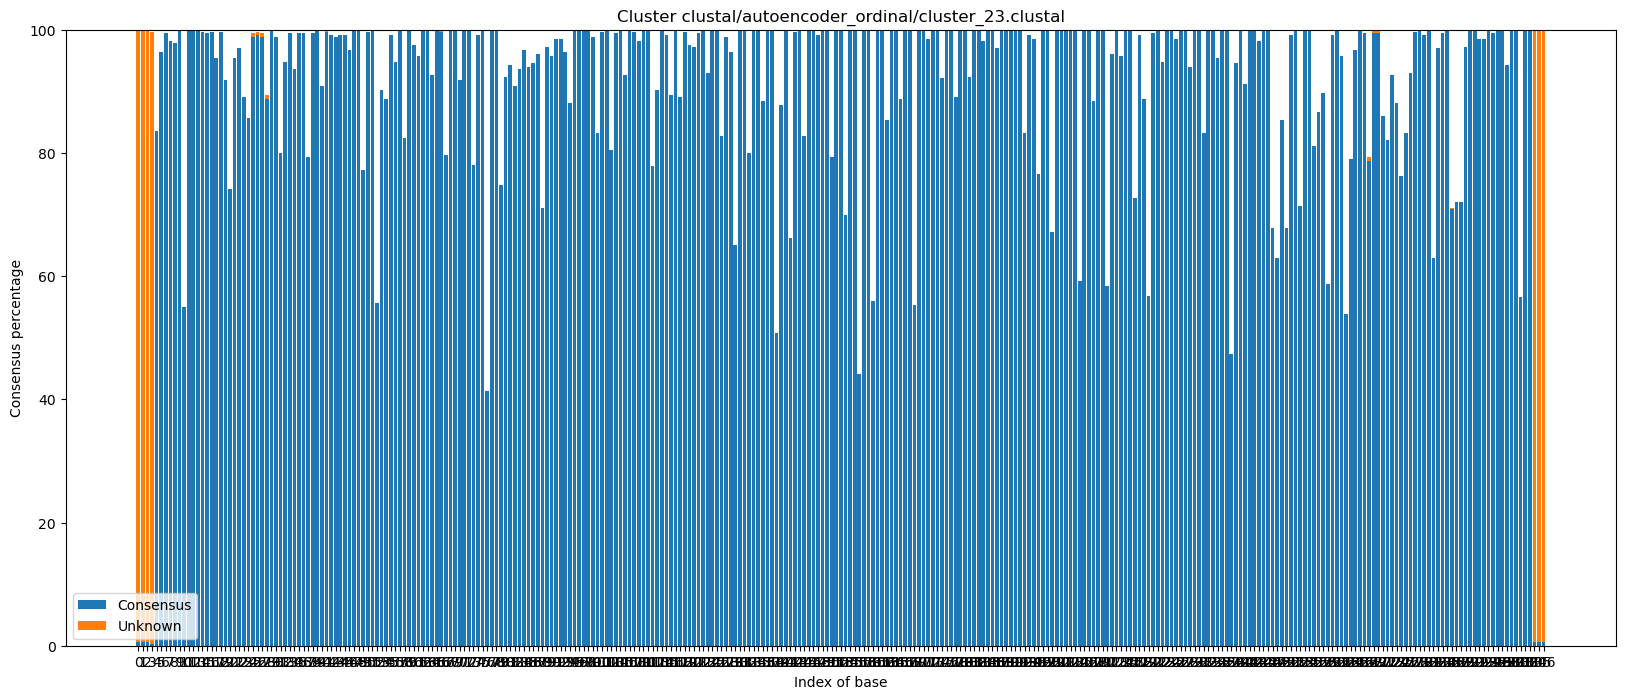

Plot for cluster 24


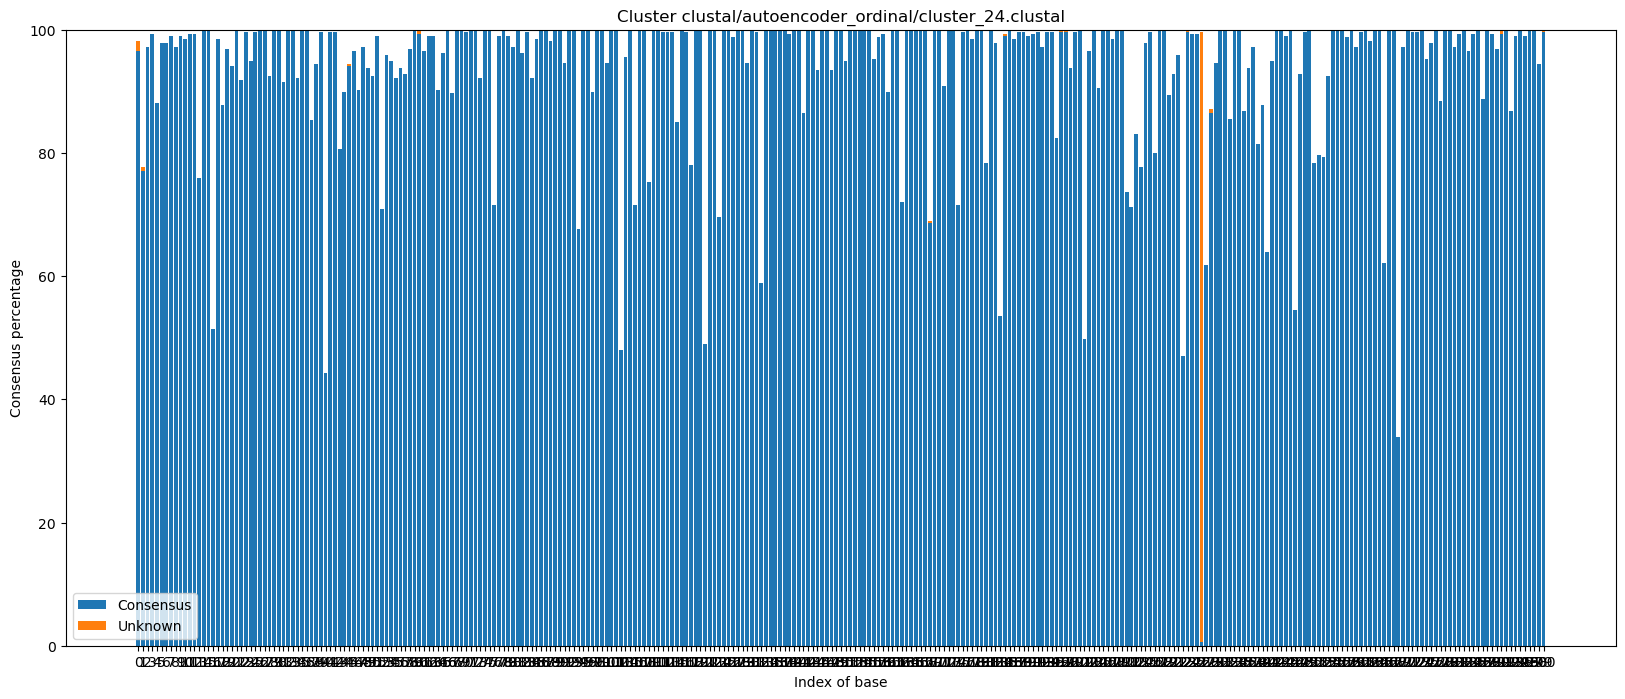

In [16]:
plotClusterRange(architecture_name, 0, num_clusters, unique_labels)

In [10]:
print(np.mean(percentages))
print(np.median(percentages))
print(np.std(percentages))

3.913759445145823
0.29258098223615464
16.36139480048737


In [11]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel(architecture_name, cluster_labels, unique_labels, stride=1)

In [12]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[98.11514392991239, 0, 96.44942528735632, 95.06482155863074, 97.34259902710215, 97.18938053097345, 96.22222222222223, 96.88559892328398, 96.42241379310344, 96.84123711340206, 96.84210526315789, 97.5030303030303, 95.5234215885947, 98.26521060842434, 96.88300220750551, 95.80232558139535, 100.0, 97.44092219020173, 97.84420289855072, 97.61428571428571, 97.7820823244552, 96.33684210526316, 96.46189376443418, 95.41033434650454, 96.69592476489026]
[1.56788 0.      3.35644 5.22096 2.80152 1.09824 1.05652 1.43972 2.237
 1.87872 1.0672  0.96528 0.93804 1.25976 0.87776 0.98868 0.758   0.67624
 1.0802  0.81996 0.80768 0.54912 0.83536 0.6278  0.61692]
33.525
1.341


In [13]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.96

In [24]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [25]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 342, 1: 8809, 2: 704, 3: 1005, 4: 740, 5: 300, 6: 331, 7: 361, 8: 520, 9: 511, 10: 302, 11: 293, 12: 331, 13: 342, 14: 310, 15: 336, 16: 1, 17: 180, 18: 122, 19: 246, 20: 258, 21: 170, 22: 213, 23: 235, 24: 267}
{0: {'gerardi': 3, 'atropurpurea': 6, 'gamblei': 4, 'Canavalia': 1, 'capillaris': 8, 'sericea': 3, 'azedarach': 1, 'sinensis': 1, 'rubescens': 4, 'pungens': 2, 'geniculatus': 3, 'subulata': 13, 'shingningensis': 2, 'levinei': 4, 'puwenensis': 1, 'acuminatum': 2, 'martabanica': 1, 'delavayi': 3, 'tzumu': 2, 'pubinerve': 1, 'filiformis': 3, 'lanatus': 7, 'aequalis': 6, 'grandis': 4, 'cristatum': 3, 'mollis': 8, 'thunbergii': 3, 'officinalis': 1, 'racemosus': 2, 'innovatus': 6, 'parthenoxylon': 1, 'trachycaulus': 5, 'echinatus': 5, 'liyuyingi': 3, 'glutinosa': 3, 'interior': 3, 'alpinum': 5, 'iners': 2, 'diandrus': 4, 'sterilis': 5, 'racemosa': 1, 'pratense': 2, 'inconspicua': 1, 'nutkaensis': 5, 'queenslandica': 1, 'nuttalliana': 2, 'palustris': 5, 'fatua': 2, 'thomsonii': 1,